<a href="https://www.kaggle.com/code/mrsimple07/deeplearning-using-pytorch-for-beginners?scriptVersionId=163577915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# First Insigths to PyTorch

In [3]:
# Creating tensors of different dimensions:
# tensor with single element
a = torch.tensor([1])
# Vector tensor: 1 dimensional(integer values)
b = torch.tensor([1, 2, 3, 4, 5])
# Matrix tensor: 2 dimensional (floating values)
# Note: Here one one element is written in float, but PyTorch #converts the rest for you (1. = 1.0)
c = torch.tensor([[1., 2, 3],[6, 7, 8]])
# 3 dimensional tensor (integer values)
d = torch.tensor([[[1, 2, 3, 4],[11, 12, 13, 14]],[[1, 2, 3, 4],[6, 7, 8, 9]]])

print(a.shape)
print('Single element tensor, a \n %s \n' % a)
print('Vector tensor, b \n %s \n' % b)
print('Matrix tensor, c \n %s \n' % c)
print('3 dimensional tensor, d \n %s \n' % d)
print('Size of tensor c = %s \n Datatype = %s \n' % (c.shape, c.dtype))
print('Size of tensor d = %s \n Datatype = %s \n' % (d.shape, d.dtype))

torch.Size([1])
Single element tensor, a 
 tensor([1]) 

Vector tensor, b 
 tensor([1, 2, 3, 4, 5]) 

Matrix tensor, c 
 tensor([[1., 2., 3.],
        [6., 7., 8.]]) 

3 dimensional tensor, d 
 tensor([[[ 1,  2,  3,  4],
         [11, 12, 13, 14]],

        [[ 1,  2,  3,  4],
         [ 6,  7,  8,  9]]]) 

Size of tensor c = torch.Size([2, 3]) 
 Datatype = torch.float32 

Size of tensor d = torch.Size([2, 2, 4]) 
 Datatype = torch.int64 



### Optimizers in Pytorch

Some optimizers:

1. SGD (Stocastic Gradient Descent)
- Classic optimizer to minimize the loss function
- It is sensitive to the choice of learning rate, and it can be crusial for convergence
- It updates the model parameters in the opposite direction of the gradient of the loss function with respect to the parameters.

2. Adam (Adaptive Momentum Estimation)
- Adaptive optimization algorithm that computes individual adaptive learning rates for different parameters
- It combines the advantage of two other extensions of SGD: AdaGrad and RMSProp
- It is computationally efficient and widely used in DL

3. RMSprop (Root Mean Square Propagation):
- Another adaptive optimization algorithm that adresses some limitations of SGD.
- It divides the learning rate by the root mean square of recent gradients for each parameter update

In [4]:
import torch.optim as optim

optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'RMSProp': optim.RMSprop,
}

### Loss functions in Pytorch

1. Mean Squared Error (MSE) Loss
- Suitable for Regression problems
- Calculates the mean squared difference between the predicted and target valuable

2. Cross- Entropy Loss 
- Computes the cross-entropy loss between predicted probabilities and target labels
- Often used for multi-class classification

3. Binary Cross-Entropy Loss
- Measures the binary cross-entropy between the predicted and target binary labels
- Suitable for binary classification problems
- Often used with sigmoid activation

In [5]:
import torch
import torch.nn as nn
import warnings

warnings.filterwarnings('ignore')

predictions = torch.tensor([[0.8, 0.2], [0.4, 0.6]])
target_class = torch.tensor([0, 1])  

mse_loss = nn.MSELoss()
mse_output = mse_loss(predictions, target_class.float())
print("MSE Loss:", mse_output.item())

ce_loss = nn.CrossEntropyLoss()
ce_output = ce_loss(predictions, target_class)
print("Cross-Entropy Loss:", ce_output.item())


MSE Loss: 0.4000000059604645
Cross-Entropy Loss: 0.5178134441375732


# Linear Regression with Pytorch

Epoch [10/100], Loss: 12.2547
Epoch [20/100], Loss: 7.3854
Epoch [30/100], Loss: 4.4731
Epoch [40/100], Loss: 2.7306
Epoch [50/100], Loss: 1.6877
Epoch [60/100], Loss: 1.0628
Epoch [70/100], Loss: 0.6880
Epoch [80/100], Loss: 0.4627
Epoch [90/100], Loss: 0.3268
Epoch [100/100], Loss: 0.2444


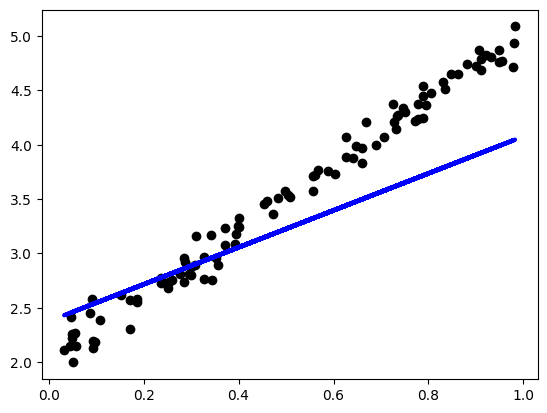

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = np.random.rand(100,1)
y = 3*X + 2 + 0.1 * np.random.randn(100,1)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

class MyLinearRegression(nn.Module):
    def __init__(self):
        super(MyLinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = MyLinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, color='black')
plt.plot(X, predicted, color='blue', linewidth=3)
plt.show()


# MNIST image recognition using Pytorch

We can download the data using torchvision.

In [7]:
import torch
from torchvision import transforms, datasets

trainset = datasets.MNIST('', download = True, train= True, transform = transforms.ToTensor())
testset =datasets.MNIST('', download = True, train = False, transform = transforms.ToTensor())

from torch.utils.data import DataLoader
train_loader = DataLoader(trainset, batch_size =64, shuffle= True)
test_loader = DataLoader(testset, batch_size =64, shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 135558236.86it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32054960.00it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50508978.68it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6337501.25it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Building a neural network. We will build a network with two hidden layers: input layers layer of 784 neurons, hidden layers of 128 and 64, and finally output layer of 10 neurons (to predict 0–9 digits). So how do we feed out images as inputs to the network? We flatten our images of size [28,28] into tensors of size 784 (28*28) before feeding them into our network. We will use torch.nn module to build our network

In [8]:
input_size = 784
hidden_size = [128,64]
output_size = 10

import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
                # Inputs to hidden layer linear transformation
        self.layer1 = nn.Linear(input_size, hidden_size[0])
        # Hidden layer 1 to HL2 linear transformation
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        # HL2 to output linear transformation
        self.layer3 = nn.Linear(hidden_size[1], output_size)

        # Define relu activation and LogSoftmax output
        self.relu = nn.ReLU()
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # HL1 with relu activation
        out = self.relu(self.layer1(x))
        # HL2 with relu activation
        out = self.relu(self.layer2(out))
        # Output layer with LogSoftmax activation
        out = self.LogSoftmax(self.layer3(out))
        return out

In [9]:
model = NeuralNet(input_size, hidden_size, output_size)

Loss function and optimizer

In [10]:
from torch import optim

lossFunction = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum = 0.9)

In [11]:
num_epochs = 10
for epoch in range(num_epochs):
    loss_ = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 784)

        # Forward Pass
        output = model(images)
        # Loss at each oteration by comparing to target(label)
        loss = lossFunction(output, labels)

        # Backpropogating gradient of loss
        optimizer.zero_grad()
        loss.backward()

        # Updating parameters(weights and bias)
        optimizer.step()

        loss_ += loss.item()
    print("Epoch{}, Training loss:{}".format(epoch, loss_ / len(train_loader)))

Epoch0, Training loss:0.9765115240966079
Epoch1, Training loss:0.33049437712663526
Epoch2, Training loss:0.2662402832828986
Epoch3, Training loss:0.22323598984732176
Epoch4, Training loss:0.19302081606035104
Epoch5, Training loss:0.16927533587619567
Epoch6, Training loss:0.14967369206988418
Epoch7, Training loss:0.13405305078463642
Epoch8, Training loss:0.1208609247059901
Epoch9, Training loss:0.10925210353189599


And now we will test our model for the test data with 10,000 image

In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 784)
        out = model(images)
        _, predicted = torch.max(out, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Testing accuracy: {} %'.format(100 * correct / total))

Testing accuracy: 96.6 %


Our model works fine!